# Diamonds Price Prediction - Machine Learning with Python

Predicting Diamonds Price by their size and other attributes.

![](https://storage.googleapis.com/kaggle-datasets-images/3376290/5873471/2d1aa08fae1541e87854fce502af798d/dataset-cover.jpeg?t=2023-06-30-10-25-49)

This notbook includes the following topics:

1. Downloading a real-world dataset
2. Preparing a dataset for training
3. Training and interpreting decision trees
4. Training and interpreting random forests
5. Overfitting, hyperparameter tuning & regularization
6. Making predictions on single inputs

# Problem Statement

The given Dataset represents a range of diamonds with different features such as size, and clarity, And also they have prices!You can discover different types of diamonds and create a model to predict unseen diamonds too.

![picture](https://drive.google.com/uc?export=view&id=1t6USVUmKRvdrlOs5K-bXWo8qHuDOgLd6)

As a diamond expert, you are tasked with creating a fully-automated system that can use this data to predict the prices of diamonds based on features like weight, quality, color, clarity and size etc., using various ML models.

# Installation of Libraries

In [1]:
!pip install opendatasets -q

In [2]:

import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Downloading the Dataset

In [3]:
dataset_url = "https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset"

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in "./diamonds-price-dataset" (use force=True to force download)


In [5]:
diamond_df = pd.read_csv("/content/diamonds-price-dataset/diamonds.csv")

In [6]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Preparing the Data for Training

Exploring columns:

In [7]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Separating input and target columns:

In [8]:
input_df = diamond_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']].copy()
input_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [9]:
target_df = diamond_df['price'].copy()
target_df

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

Finding numeric and categorical columns:

In [10]:
numeric_cols = input_df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols

['carat', 'depth', 'table', 'x', 'y', 'z']

Finding number of unique values in categorical columns:

In [11]:
input_df[['cut', 'color', 'clarity']].nunique()

cut        5
color      7
clarity    8
dtype: int64

In [12]:
input_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

Encoding categorical columns to numeric values using OneHotEncoder().

In [13]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(input_df[['cut', 'color', 'clarity']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [14]:
encoded_cols = list(encoder.get_feature_names_out(['cut', 'color', 'clarity']))
len(encoded_cols)

20

In [15]:
input_df[encoded_cols] = encoder.transform(input_df[['cut', 'color', 'clarity']])

Merging categorical and numeric columns.

In [16]:
input_df = input_df[numeric_cols + encoded_cols]

In [17]:
input_df

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,5.75,5.76,3.50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.72,63.1,55.0,5.69,5.75,3.61,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.70,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Variation of inputs:

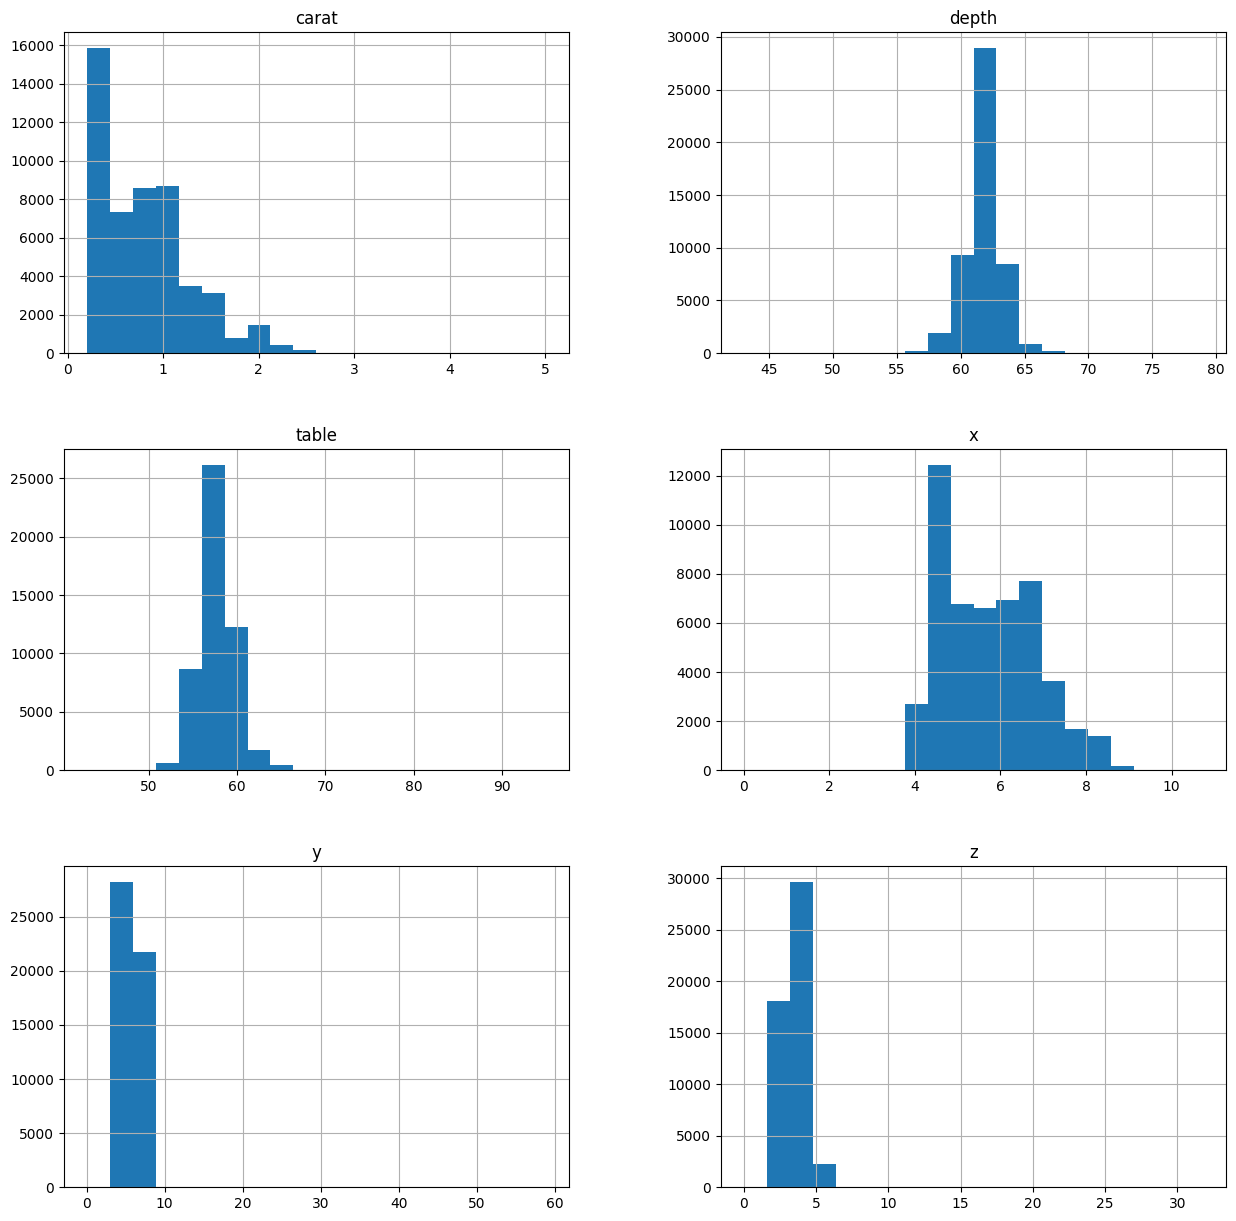

In [18]:
input_df[numeric_cols].hist(bins=20, figsize=(15,15))
plt.show()

# Correlation
Data correlation is the way in which one set of data may correspond to another set. In ML, think of how your features correspond with your output.
Here,

* carat is maximum correlated with price.
* x, y, and z are also correlated with price.
* depth and table are least correlated with price. So they may be not useful for the predictions.

          carat     depth     table     price         x         y         z
carat  1.000000  0.027734  0.183639  0.921804  0.975037  0.950035  0.952700
depth  0.027734  1.000000 -0.293012 -0.012731 -0.025563 -0.029809  0.094337
table  0.183639 -0.293012  1.000000  0.129848  0.197198  0.185248  0.153161
price  0.921804 -0.012731  0.129848  1.000000  0.884919  0.864393  0.860963
x      0.975037 -0.025563  0.197198  0.884919  1.000000  0.972977  0.970122
y      0.950035 -0.029809  0.185248  0.864393  0.972977  1.000000  0.950030
z      0.952700  0.094337  0.153161  0.860963  0.970122  0.950030  1.000000


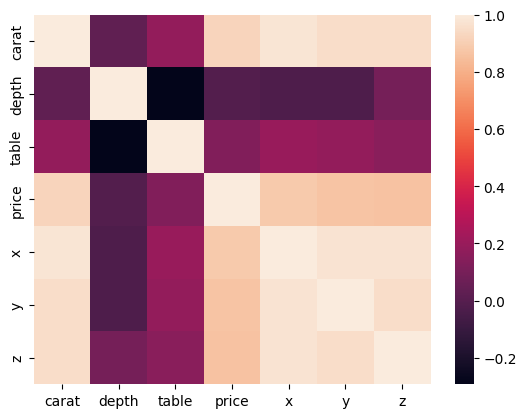

In [19]:
print(diamond_df.corr(numeric_only = True))
dataplot = sns.heatmap(diamond_df.corr(numeric_only = True))

Dropping table and depth columns.

In [20]:
input_df = input_df.drop(['depth', 'table'], axis = 'columns')
input_df

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,3.95,3.98,2.43,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,3.89,3.84,2.31,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,4.05,4.07,2.31,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,4.20,4.23,2.63,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,4.34,4.35,2.75,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,5.75,5.76,3.50,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.72,5.69,5.75,3.61,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.70,5.66,5.68,3.56,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.86,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Train-Test Data Split:

A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing. We will split the data accordingly.

In [21]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_df,
                                                                        target_df,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [22]:
train_inputs

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
39087,0.50,5.06,5.03,3.21,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30893,0.35,4.61,4.56,2.76,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45278,1.01,6.31,6.22,4.03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,1.01,6.27,6.35,3.99,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13653,1.23,6.98,6.94,4.22,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.00,6.36,6.41,3.95,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44732,0.52,5.17,5.22,3.20,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38158,0.40,4.72,4.66,2.93,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,0.73,5.79,5.81,3.56,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
val_inputs

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33553,0.61,5.44,5.49,3.34,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9427,0.91,6.11,6.06,3.90,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,0.77,5.83,5.88,3.64,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12447,1.13,6.72,6.75,4.09,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39489,0.32,4.33,4.36,2.74,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,0.30,4.31,4.34,2.63,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25079,0.32,4.34,4.38,2.72,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18707,1.41,7.17,7.21,4.40,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15200,1.20,6.78,6.76,4.22,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
train_targets

39087    1286
30893     827
45278    2036
16398    7137
13653    5951
         ... 
11284    5197
44732    1958
38158    1200
860      2886
15795    6810
Name: price, Length: 40000, dtype: int64

In [25]:
val_targets

33553     931
9427     4744
199      2781
12447    5531
39489     505
         ... 
28567     742
25079     645
18707    8654
15200    6569
5857     4036
Name: price, Length: 10000, dtype: int64

# LinearRegression: Ridge Regressor

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model1 = Ridge()
model1.fit(train_inputs, train_targets)
train_prediction1 = model1.predict(train_inputs)
print(train_prediction1)

train_rmse = mean_squared_error(train_targets, train_prediction1, squared = False)
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

val_prediction1 = model1.predict(val_inputs)
print(val_prediction1)

val_rmse = mean_squared_error(val_targets, val_prediction1, squared = False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))


[ 790.36980755  378.86610968 1196.42291389 ... 1686.36355358 3332.6977277
 6697.42568689]
The RMSE loss for the training set is $ 1143.677135921377.
[-1940.82489044  5216.17906254  2930.94263302 ...  9248.65703918
  6618.89681695  4723.04919244]
The RMSE loss for the validation set is $ 1101.3057999799598.


In [27]:
weights = model1.coef_
print(weights)

weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weights': weights
}).sort_values('weights', ascending = False)
print(weights_df)

impact_val = max(map(abs, weights_df.weights))
print(impact_val)

[11094.12559613  -754.9126431    124.88259826  -542.49295267
  -665.34376799   -30.52277622   329.35819532   197.75373893
   168.75460994   842.12944673   617.27691499   555.44397124
   342.92851724  -163.38904347  -640.62030829 -1553.76949841
 -3815.16378946  1567.05618761  -163.56016892 -1123.00589485
   752.00692805   443.3020422   1208.21144818  1131.15324714]
          columns       weights
0           carat  11094.125596
17     clarity_IF   1567.056188
22   clarity_VVS1   1208.211448
23   clarity_VVS2   1131.153247
9         color_D    842.129447
20    clarity_VS1    752.006928
10        color_E    617.276915
11        color_F    555.443971
21    clarity_VS2    443.302042
12        color_G    342.928517
6       cut_Ideal    329.358195
7     cut_Premium    197.753739
8   cut_Very Good    168.754610
2               y    124.882598
5        cut_Good    -30.522776
13        color_H   -163.389043
18    clarity_SI1   -163.560169
3               z   -542.492953
14        color_I   -640.

# DecisionTreesRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state=42)


In [29]:
%%time
model2.fit(train_inputs, train_targets)
score = model2.score(train_inputs, train_targets)
print("R-squared: ", score)

val_prediction2 = model2.predict(val_inputs)
mse = mean_squared_error(val_targets, val_prediction2)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R-squared:  0.9999825954225976
MSE:  528724.207
RMSE:  727.1342427640168
CPU times: user 317 ms, sys: 20.8 ms, total: 338 ms
Wall time: 326 ms


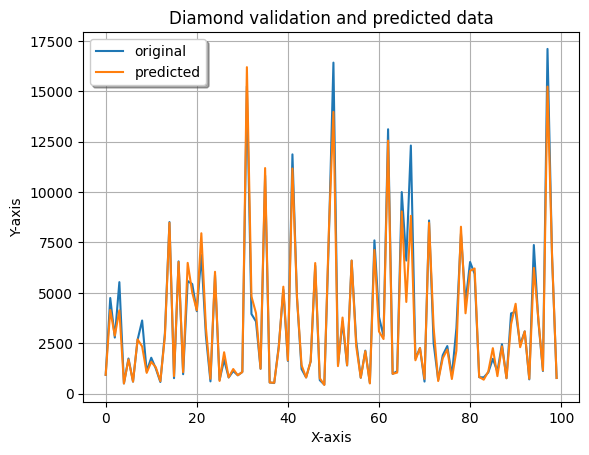

In [30]:

x_ax = range(len(val_targets))
plt.plot(x_ax[:100], val_targets[:100], label="original")
plt.plot(x_ax[:100], val_prediction2[:100], label="predicted")
plt.title("Diamond validation and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


# RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()


In [32]:
%%time
model3.fit(train_inputs, train_targets)

print("Train R-squared score: ",model3.score(train_inputs, train_targets))
print("Validation R-squared score: ",model3.score(val_inputs, val_targets))

val_prediction3 = model3.predict(val_inputs)
mse = mean_squared_error(val_targets, val_prediction3)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))


Train R-squared score:  0.9971750662224557
Validation R-squared score:  0.9807767782790404
MSE:  297129.3657585603
RMSE:  545.0957399930404
CPU times: user 28.1 s, sys: 376 ms, total: 28.4 s
Wall time: 39.8 s


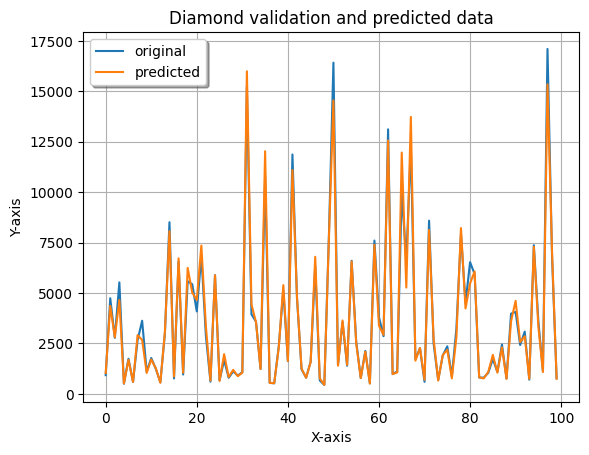

In [33]:
x_ax = range(len(val_targets))
plt.plot(x_ax[:100], val_targets[:100], label="original")
plt.plot(x_ax[:100], val_prediction3[:100], label="predicted")
plt.title("Diamond validation and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


# Comparison of the performances of the models mentioned above.

In [34]:

def evaluate(model, val_inputs, val_targets):
    predictions = model.predict(val_inputs)
    errors = abs(predictions - val_targets)
    mape = 100 * np.mean(errors / val_targets)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print()

    return accuracy

print("RandomForestRegressor Model Performance: ")
rfr_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfr_model.fit(train_inputs, train_targets)
rfr_accuracy = evaluate(rfr_model, val_inputs, val_targets)

print("DecisionTreesRegressor Model Performance: ")
dtr_model = DecisionTreeRegressor(random_state=42)
dtr_model.fit(train_inputs, train_targets)
dtr_accuracy = evaluate(dtr_model, val_inputs, val_targets)

print("LinearRegressor Model Performance: ")
lr_model = Ridge()
lr_model.fit(train_inputs, train_targets)
lr_accuracy = evaluate(lr_model, val_inputs, val_targets)



RandomForestRegressor Model Performance: 
Model Performance
Average Error: 284.3903 degrees.
Accuracy = 93.03%.

DecisionTreesRegressor Model Performance: 
Model Performance
Average Error: 356.1436 degrees.
Accuracy = 91.44%.

LinearRegressor Model Performance: 
Model Performance
Average Error: 722.3724 degrees.
Accuracy = 61.40%.



Best performance anaysis:

---



RandomForestRegressor Model > DecisionTreesRegressor Model > LinearRegressor Model

#RandomForestRegressor Model hypertuning

In [35]:
from tqdm import tqdm

In [36]:
def params(n_estimatorsList, max_depthList):
  dic = [[] for _ in n_estimatorsList]
  x = 0
  for estimator in n_estimatorsList:
    for depth in tqdm(max_depthList):
      model = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
      model.fit(train_inputs, train_targets)
      dic[x].append(model.score(val_inputs, val_targets))
    x += 1
  pp = pprint.PrettyPrinter(indent=4)
  pp.pprint(dic)

  for i in range(len(n_estimatorsList)):
    plt.plot(max_depthList, dic[i], label="Estimators: " + str(n_estimatorsList[i]))
  plt.title("Diamond validation and predicted data")
  plt.xlabel('max_depth')
  plt.ylabel('accuracy')
  plt.legend(loc='best',fancybox=True, shadow=True)
  plt.grid(True)
  plt.show()

100%|██████████| 10/10 [01:19<00:00,  7.95s/it]


[   [   0.8834940040631691,
        0.9375237414378621,
        0.9659004705748372,
        0.9788268636975956,
        0.9811012018066911,
        0.9809835110888554,
        0.980484231159723,
        0.9807349978325536,
        0.980416505725287,
        0.9805757713734573],
    [   0.882145405167287,
        0.9369102090019052,
        0.9663732177205141,
        0.9784730092709463,
        0.9809870175985378,
        0.9812780988327571,
        0.9809626941545636,
        0.9806151505210773,
        0.9808438328464403,
        0.9808809944378387],
    [   0.8831584111465922,
        0.937685043040124,
        0.9665142261716403,
        0.9787091791876893,
        0.9813763632451145,
        0.9808045782866742,
        0.9808835941673074,
        0.9807208264158269,
        0.9805150197630009,
        0.9807847466322179]]


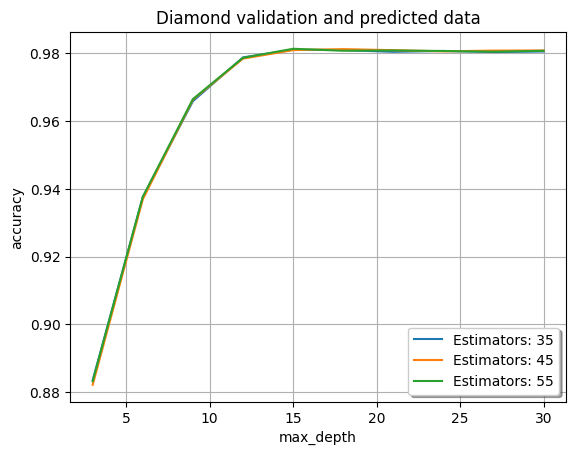

In [37]:
params(range(35,60,10), range(3,31,3))

Here, we observe that accuracy is increasing till max_depth = 15 after which it is getting constant.

100%|██████████| 30/30 [02:43<00:00,  5.44s/it]


[   [   0.6411142234030709,
        0.8334218980316163,
        0.8844296821366534,
        0.9094463677773614,
        0.9204926180192565,
        0.9364307686969636,
        0.9509124318872239,
        0.9570833374327544,
        0.9658828199556607,
        0.9721452021821166,
        0.9757031192266286,
        0.9783300141226695,
        0.9797241624299696,
        0.9806777263260963,
        0.9805095952787789,
        0.9803122214346697,
        0.9806115679304392,
        0.980549076114379,
        0.9805598945975879,
        0.9801437900499004,
        0.9801479736669859,
        0.9802401849281546,
        0.9805082719994123,
        0.9800415385071076,
        0.9805047467068763,
        0.9800018832987094,
        0.9801760943523855,
        0.9798826444721371,
        0.9802679006243701,
        0.9801390598363597],
    [   0.6448198984949056,
        0.8373932431001104,
        0.8812839794121605,
        0.9031856445169707,
        0.9229749954640483,
        0.9373833224

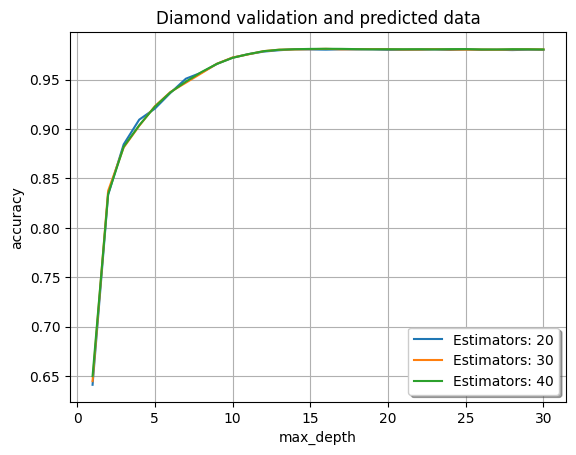

In [39]:
params(range(20,50,10), range(1,31))

#Best hyperparameter for the model.

By the analysis from the above graph, accuracy is maximum found to be 98.11 % for n_estimator = 40 and max_depth = 16. Hence these hyperparameters are best for the RandomForestRegressor model.

In [40]:
!pip install jovian --upgrade -q
import jovian

In [41]:
jovian.reset()
jovian.log_hyperparams(n_estimator=40, max_depth=16)

[jovian] Hyperparams logged.


# References:
*   Geeksforgeeks
*   Jovian notebooks and lectures
*   Stackoverflow




